In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [38]:
np.random.seed(42)
def pointincircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [39]:
df = pd.DataFrame(pointincircum(500, 1000))
df = pd.concat([
    df,
    pd.DataFrame(pointincircum(300, 700)),
    pd.DataFrame(pointincircum(100, 300)),
    pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])
], ignore_index=True)


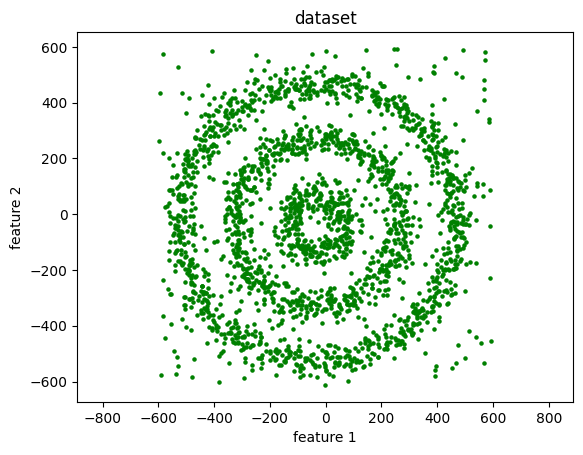

In [40]:
plt.scatter(df[0], df[1], s=5,color="green")
plt.title("dataset")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.axis('equal')
plt.show()


In [41]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=30,min_samples=5)

In [42]:
dbscan.fit(df[[0,1]])
df['DB_clusters']=dbscan.labels_

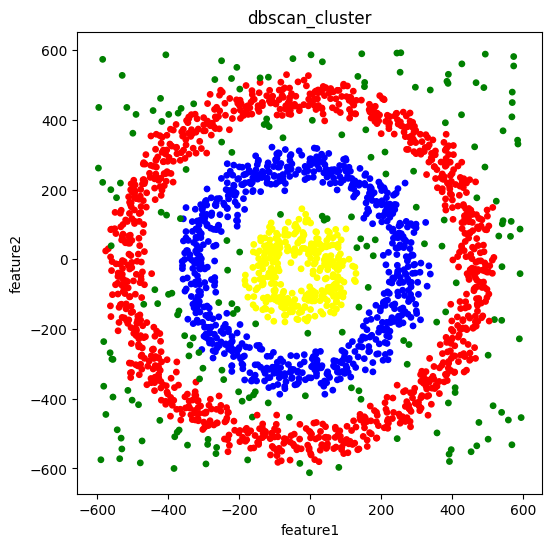

In [44]:
colors=['green','red','blue','yellow']
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DB_clusters'], cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title("dbscan_cluster")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [48]:
df['DB_clusters'].value_counts()

DB_clusters
 0    1044
 1     738
 2     319
-1     199
Name: count, dtype: int64